<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Metadata" data-toc-modified-id="Metadata-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metadata</a></span></li><li><span><a href="#Counts" data-toc-modified-id="Counts-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Counts</a></span></li><li><span><a href="#Alpha-div" data-toc-modified-id="Alpha-div-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Alpha div</a></span></li><li><span><a href="#ML-performance" data-toc-modified-id="ML-performance-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>ML performance</a></span></li></ul></li><li><span><a href="#Format" data-toc-modified-id="Format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format</a></span><ul class="toc-item"><li><span><a href="#Overlap" data-toc-modified-id="Overlap-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Overlap</a></span></li><li><span><a href="#Merging" data-toc-modified-id="Merging-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Merging</a></span></li></ul></li><li><span><a href="#ML-settings" data-toc-modified-id="ML-settings-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML settings</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#Westernization" data-toc-modified-id="Westernization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Westernization</a></span><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>RF</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Gender" data-toc-modified-id="Gender-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gender</a></span><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>RF</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Disease" data-toc-modified-id="Disease-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Disease</a></span><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>RF</a></span><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Performance-summary" data-toc-modified-id="Performance-summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Performance summary</a></span><ul class="toc-item"><li><span><a href="#Comparing-to-performance-to-all-measures" data-toc-modified-id="Comparing-to-performance-to-all-measures-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Comparing to performance to all measures</a></span><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>Stats</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* ML with just tree-agnostic alpha div measures

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ML/'

# sample metadata
## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# alpha diversity
## standard
alpha_div_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/alpha_div_cog-pfam.tsv'

# ML performance w/ all measures
ml_perf_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ML/alpha-div_ml_dsBlock_mtry4_performance.tsv'

# params
threads = 8
seed = 2821

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
library(Boruta)
library(mlr)
library(randomForest)
library(parallelMap)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
setDTthreads(threads)
make_dir(work_dir)
set.seed(seed)
df.dims()

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ML/ 


In [5]:
# custom boruta filter
mlr_boruta_filter()

Filter: 'boruta.filter'
Packages: ''
Supported tasks: classif,regr
Supported features: numerics,factors,ordered

# Load

## Metadata

In [6]:
# sample metadata
meta = Fread(metadata_file) 
meta %>% unique_n('Samples', Sample)
meta %>% unique_n('Subjects', subjectID)
meta %>% unique_n('Datasets', dataset_name)
meta

No. of unique Samples: 2943 
No. of unique Subjects: 2943 
No. of unique Datasets: 30 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,TRAVELRES1_2,stool,no,control,healthy,25,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
Bengtsson-PalmeJ_2015,TRAVELRES11,TRAVELRES11_12,stool,no,control,healthy,22,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446


## Counts

In [7]:
# Bracken count table
brk = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = gsub(' ', '_', name))
brk 

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


## Alpha div

In [8]:
# alpha div
alpha_div = Fread(alpha_div_file) %>%
    select.(Sample, nobs, shannon, simpson, pielou)
alpha_div

Sample,nobs,shannon,simpson,pielou
<chr>,<int>,<dbl>,<dbl>,<dbl>
A01_02_1FE,232,3.888802,0.9507426,0.4757117
A02_01_1FE,176,3.418777,0.8891672,0.4182143
⋮,⋮,⋮,⋮,⋮
nHMX11726,272,3.612832,0.8932187,0.4419526
scavenger.11.60.0,210,3.891553,0.9557596,0.4760482


## ML performance

* All measures

In [9]:
# loading
ml_perf_all = Fread(ml_perf_file)
ml_perf_all

iter,target,measure,value
<int>,<chr>,<chr>,<dbl>
1,westernized,auc,0.9162727
2,westernized,auc,0.9150743
⋮,⋮,⋮,⋮
4,disease,f1,0.6833013
5,disease,f1,0.7015504


# Format

## Overlap

In [10]:
overlap(alpha_div$Sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


## Merging

In [11]:
feats = meta %>%
    select.(dataset_name, Sample, age, BMI, gender, westernized, disease) %>%
    mutate.(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    inner_join.(alpha_div, c('Sample')) 

feats$Sample %>% unique_n('Samples')
feats$dataset_name %>% unique_n('Datasets')
feats

No. of unique Samples: 2943 
No. of unique Datasets: 30 


dataset_name,Sample,age,BMI,gender,westernized,disease,nobs,shannon,simpson,pielou
<chr>,<chr>,<int>,<dbl>,<chr>,<lgl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
PasolliE_2018,A01_02_1FE,NA,NA,,FALSE,healthy,232,3.888802,0.9507426,0.4757117
PasolliE_2018,A02_01_1FE,NA,NA,,FALSE,healthy,176,3.418777,0.8891672,0.4182143
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
LiJ_2017,nHMX11726,NA,NA,,TRUE,healthy,272,3.612832,0.8932187,0.4419526
CosteaPI_2017,scavenger.11.60.0,NA,NA,,TRUE,healthy,210,3.891553,0.9557596,0.4760482


# ML settings

In [12]:
conda_env = '/ebio/abt3_projects2/global_metagenome_diversity/envs/tidyverse-ml'
resources = list(h_rt = '00:59:00',
                 h_vmem = '12G',
                 conda.env = conda_env)

In [13]:
perf_res = list()

## functions

In [14]:
# classifier performance
cls_perf = function(res){
    cat('--AUC--\n')
    res$measures.test$auc %>% summary %>% print
    cat('--F1--\n')
    res$measures.test$f1 %>% summary %>% print
    cat('--plot--\n')
    p = res$measures.test %>%
        pivot_longer.(cols=c(-iter), names_to='metric', values_to='value') %>%
        ggplot(aes(metric, value)) +
        geom_boxplot() +
        theme_bw()  
    p.dims(4,2.5)
    plot(p)
}

In [15]:
#' feature importance
merge_feat_imp = function(iter, feat_imp){
    res = feat_imp[[iter]]$res
    res$iter = iter
    return(res)  
}

get_feat_imp = function(res, threads){
    doParallel::registerDoParallel(threads)
    feat_imp = res$models %>%
        plyr::llply(function(x) getFeatureImportance(x)$res,
                    .parallel=TRUE) %>%
        rbindlist(use.names=TRUE, idcol='cv_rep')
    return(feat_imp)
}

In [16]:
# plotting most important features
plot_feat_imp = function(feat_imp, max_rank = 50, y_offset=-0.01){
    p = feat_imp %>%
        mutate.(rank = dense_rank(-importance),
                .by=c('cv_rep')) %>%
        mutate.(mean_rank = mean(rank),
                .by=c(variable)) %>%
        filter.(mean_rank < max_rank) %>%
        mutate.(measure_type = case_when.(grepl('MPD|MNTD', variable) ~ 'eco-phy',
                                       grepl('FEve|FRic|FDis|RaoQ|FDiv', variable) ~ 'func. div.',
                                       TRUE ~ 'alpha div.')) %>%
        mutate.(data_type = case_when.(grepl('gtdb', variable) ~ 'phylogeny',
                                       grepl('trt', variable) ~ 'trait',
                                       grepl('pfam|cog', variable) ~ 'COG/Pfam',
                                       TRUE ~ 'no tree')) %>%
        mutate.(variable = variable %>% reorder(-mean_rank)) %>%
        ggplot(aes(variable, importance)) +
        geom_point(aes(y=y_offset, fill=data_type), pch=22, size=4) +
        geom_boxplot(aes(color=measure_type)) +
        scale_color_discrete('Measure') +
        scale_fill_discrete('Tree') +
        theme_bw() +
        theme(
            axis.text.x = element_text(angle=45, hjust=1)
        ) +
        coord_flip()
    return(p)
}

# Westernization

In [17]:
target = 'westernized'
measures = list(auc, acc, mcc, f1)
cv_iters = 5

In [18]:
# formatting
feats_f = feats %>%
    select.(-age, -BMI, -gender, -disease) %>%
    filter.(!is.na(westernized)) %>%
    as.data.frame
rownames(feats_f) = feats_f$Sample
feats_f$Sample = NULL
feats_f

,dataset_name,westernized,nobs,shannon,simpson,pielou
,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>
A01_02_1FE,PasolliE_2018,FALSE,232,3.888802,0.9507426,0.4757117
A02_01_1FE,PasolliE_2018,FALSE,176,3.418777,0.8891672,0.4182143
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,LiJ_2017,TRUE,272,3.612832,0.8932187,0.4419526
scavenger.11.60.0,CosteaPI_2017,TRUE,210,3.891553,0.9557596,0.4760482


In [19]:
# summary
## target
feats_f[,target] %>% table
## all features
feats_f %>% summary

.
FALSE  TRUE 
  455  2488 

 dataset_name       westernized          nobs          shannon      
 Length:2943        Mode :logical   Min.   : 23.0   Min.   :0.7248  
 Class :character   FALSE:455       1st Qu.:236.0   1st Qu.:3.6358  
 Mode  :character   TRUE :2488      Median :279.0   Median :4.1292  
                                    Mean   :273.5   Mean   :3.9862  
                                    3rd Qu.:316.0   3rd Qu.:4.4516  
                                    Max.   :469.0   Max.   :5.2184  
    simpson           pielou       
 Min.   :0.2267   Min.   :0.08866  
 1st Qu.:0.9282   1st Qu.:0.44477  
 Median :0.9601   Median :0.50512  
 Mean   :0.9383   Mean   :0.48763  
 3rd Qu.:0.9749   3rd Qu.:0.54456  
 Max.   :0.9897   Max.   :0.63836  

## RF

In [20]:
# creating mlr task
tsk = makeClassifTask(data = feats_f %>% select(-dataset_name), 
                      target = target, 
                      blocking = feats_f$dataset_name %>% as.factor)
tsk

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: westernized
Observations: 2943
Features:
   numerics     factors     ordered functionals 
          4           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
FALSE  TRUE 
  455  2488 
Positive class: FALSE

In [21]:
# what sampling rate to use?
rate = 1/5
undersample(tsk, rate = rate)

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: westernized
Observations: 953
Features:
   numerics     factors     ordered functionals 
          4           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
FALSE  TRUE 
  455   498 
Positive class: FALSE

In [22]:
## feature selection (wrapping the RF learner)
lrn = makeLearner('classif.cforest', predict.type = 'prob', 
                  ntree = 500, mtry=4)
lrn

Learner classif.cforest from package party
Type: classif
Name: Random forest based on conditional inference trees; Short name: cforest
Class: classif.cforest
Properties: twoclass,multiclass,prob,factors,numerics,ordered,weights,missings,featimp
Predict-Type: prob
Hyperparameters: ntree=500,mtry=4


In [23]:
# sampling
lrn = makeUndersampleWrapper(lrn, usw.rate = rate)
lrn

Learner classif.cforest.undersampled from package mlr,party
Type: classif
Name: ; Short name: 
Class: UndersampleWrapper
Properties: numerics,factors,ordered,missings,weights,prob,twoclass,multiclass,featimp
Predict-Type: prob
Hyperparameters: ntree=500,mtry=4,usw.rate=0.2


In [24]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=8.

Resampling: cross-validation

Measures:             auc       acc       mcc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 8; elements = 5.




Aggregated Result: auc.test.mean=0.6562581,acc.test.mean=0.6500346,mcc.test.mean=0.1831888,f1.test.mean=0.3397478




Stopped parallelization. All cleaned up.



### Performance

In [25]:
df.dims(30)
perf_res[['westernized_RF']] = res$measures.test
res$measures.test
df.dims()

iter,auc,acc,mcc,f1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6445651,0.6298812,0.1386980,0.3144654
2,0.6937240,0.6921769,0.2587597,0.3780069
3,0.6367397,0.6485569,0.1669198,0.3344051
4,0.6390696,0.6598639,0.1786198,0.3506494
5,0.6671919,0.6196944,0.1729466,0.3212121


--AUC--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6367  0.6391  0.6446  0.6563  0.6672  0.6937 
--F1--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3145  0.3212  0.3344  0.3397  0.3506  0.3780 
--plot--


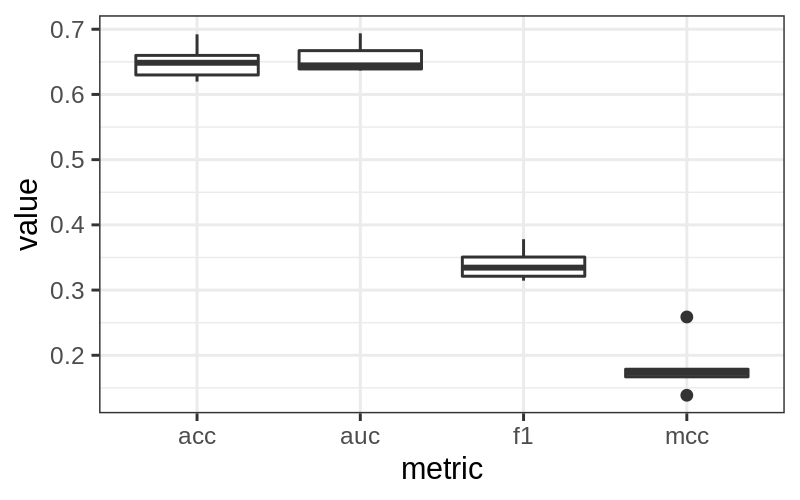

In [26]:
# performance
cls_perf(res)

In [27]:
# getting feat imp
feat_imp = get_feat_imp(res)
feat_imp

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,nobs,0.03660932
1,shannon,0.01524731
⋮,⋮,⋮
5,simpson,0.03091489
5,pielou,0.02682979


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/bc857e54d0c1e0cddbd778b2e870c039.RDS 


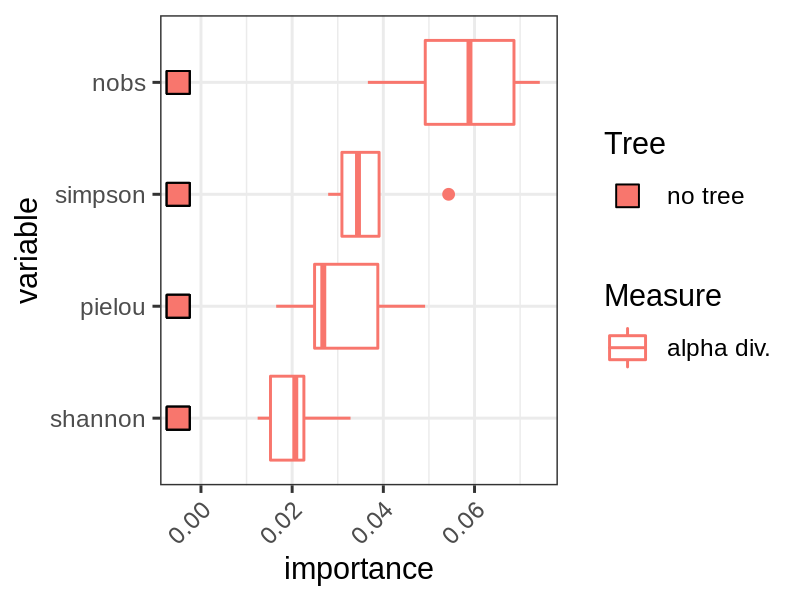

In [28]:
# plotting the most important features
p = plot_feat_imp(feat_imp, y_offset=-0.005)
p.dims(4,3)
Plot(p)

# Gender

In [29]:
target = 'gender'
measures = list(auc, acc, mcc, f1)
cv_iters = 5

In [30]:
# formatting
feats_f = feats %>%
    select.(-age, -BMI, -westernized, -disease) %>%
    filter.(!is.na(gender),
            gender != '') %>%
    as.data.frame
rownames(feats_f) = feats_f$Sample
feats_f$Sample = NULL
feats_f

,dataset_name,gender,nobs,shannon,simpson,pielou
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
A11_01_1FE,PasolliE_2018,male,233,3.576704,0.9286988,0.4375333
A13_01_1FE,PasolliE_2018,male,250,4.438556,0.9763921,0.5429624
⋮,⋮,⋮,⋮,⋮,⋮,⋮
YSZC12003_37879,XieH_2016,female,196,3.230018,0.8847015,0.3951236
YSZC12003_37880,XieH_2016,female,267,3.703088,0.9290237,0.4529936


In [31]:
# summary
## target
feats_f[,target] %>% table
## all features
feats_f %>% summary

.
female   male 
  1102    723 

 dataset_name          gender               nobs          shannon     
 Length:1825        Length:1825        Min.   : 84.0   Min.   :1.365  
 Class :character   Class :character   1st Qu.:238.0   1st Qu.:3.694  
 Mode  :character   Mode  :character   Median :279.0   Median :4.154  
                                       Mean   :274.5   Mean   :4.020  
                                       3rd Qu.:315.0   3rd Qu.:4.449  
                                       Max.   :455.0   Max.   :5.218  
    simpson           pielou      
 Min.   :0.4596   Min.   :0.1670  
 1st Qu.:0.9325   1st Qu.:0.4519  
 Median :0.9620   Median :0.5081  
 Mean   :0.9431   Mean   :0.4917  
 3rd Qu.:0.9750   3rd Qu.:0.5443  
 Max.   :0.9892   Max.   :0.6384  

## RF

In [32]:
# creating mlr task
tsk = makeClassifTask(data = feats_f %>% select(-dataset_name), 
                      target = target, 
                      blocking = feats_f$dataset_name %>% as.factor)
tsk

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: gender
Observations: 1825
Features:
   numerics     factors     ordered functionals 
          4           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
female   male 
  1102    723 
Positive class: female

In [33]:
# what sampling rate to use?
rate = 1/1.5
undersample(tsk, rate = rate)

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: gender
Observations: 1458
Features:
   numerics     factors     ordered functionals 
          4           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
female   male 
   735    723 
Positive class: female

In [34]:
## feature selection (wrapping the RF learner)
lrn = makeLearner('classif.cforest', predict.type = 'prob', 
                  ntree = 500, mtry = 4)
lrn

Learner classif.cforest from package party
Type: classif
Name: Random forest based on conditional inference trees; Short name: cforest
Class: classif.cforest
Properties: twoclass,multiclass,prob,factors,numerics,ordered,weights,missings,featimp
Predict-Type: prob
Hyperparameters: ntree=500,mtry=4


In [35]:
# sampling
lrn = makeUndersampleWrapper(lrn, usw.rate = rate)
lrn

Learner classif.cforest.undersampled from package mlr,party
Type: classif
Name: ; Short name: 
Class: UndersampleWrapper
Properties: numerics,factors,ordered,missings,weights,prob,twoclass,multiclass,featimp
Predict-Type: prob
Hyperparameters: ntree=500,mtry=4,usw.rate=0.667


In [36]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=8.

Resampling: cross-validation

Measures:             auc       acc       mcc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 8; elements = 5.




Aggregated Result: auc.test.mean=0.5851257,acc.test.mean=0.5687671,mcc.test.mean=0.1186251,f1.test.mean=0.6298591




Stopped parallelization. All cleaned up.



### Performance

In [37]:
df.dims(30)
perf_res[['gender_RF']] = res$measures.test
res$measures.test
df.dims()

iter,auc,acc,mcc,f1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5673628,0.5534247,0.06411834,0.6320542
2,0.6362829,0.5945205,0.18639239,0.6476190
3,0.5533650,0.5616438,0.09019119,0.6347032
4,0.5794054,0.5589041,0.10467726,0.6120482
5,0.5892124,0.5753425,0.14774644,0.6228710


--AUC--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5534  0.5674  0.5794  0.5851  0.5892  0.6363 
--F1--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6120  0.6229  0.6321  0.6299  0.6347  0.6476 
--plot--


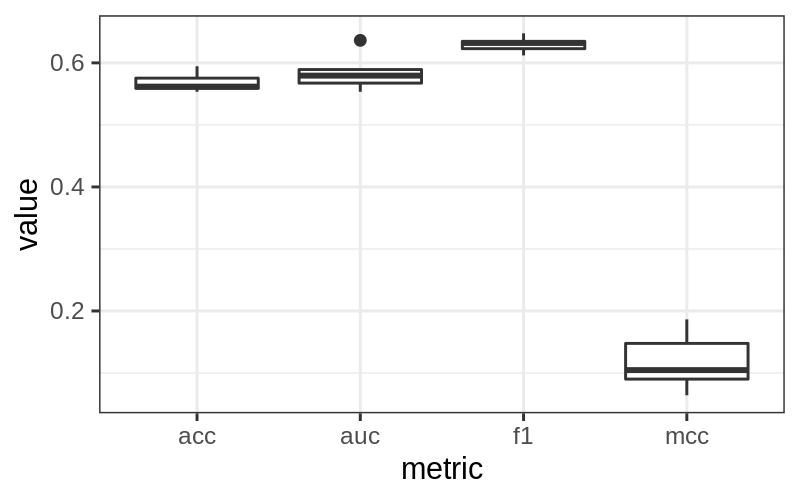

In [38]:
# performance
cls_perf(res)

In [39]:
# getting feat imp
feat_imp = get_feat_imp(res)
feat_imp

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,nobs,0.032144522
1,shannon,0.004438228
⋮,⋮,⋮
5,simpson,-0.001715618
5,pielou,0.002811189


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/2e99bbf785dd814bcc353bcd7e5d8a0d.RDS 


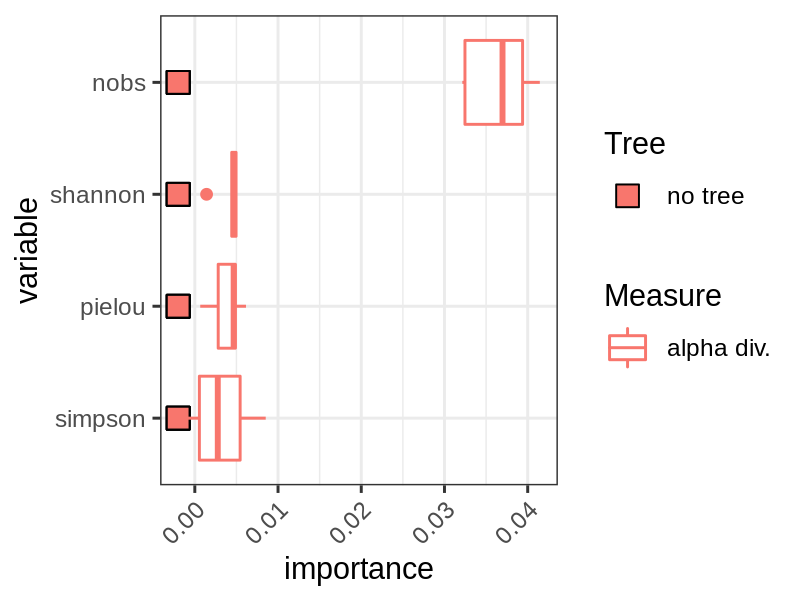

In [40]:
# plotting the most important features
p = plot_feat_imp(feat_imp, y_offset=-0.002)
p.dims(4,3)
Plot(p)

# Disease

In [41]:
target = 'disease'
measures = list(auc, acc, mcc, f1)
cv_iters = 5

In [42]:
# formatting
feats_f = feats %>%
    select.(-age, -BMI, -westernized, -gender) %>%
    filter.(!is.na(disease),
            disease != '') %>%
    as.data.frame
rownames(feats_f) = feats_f$Sample
feats_f$Sample = NULL
feats_f

,dataset_name,disease,nobs,shannon,simpson,pielou
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
A01_02_1FE,PasolliE_2018,healthy,232,3.888802,0.9507426,0.4757117
A02_01_1FE,PasolliE_2018,healthy,176,3.418777,0.8891672,0.4182143
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,LiJ_2017,healthy,272,3.612832,0.8932187,0.4419526
scavenger.11.60.0,CosteaPI_2017,healthy,210,3.891553,0.9557596,0.4760482


In [43]:
# summary
## target
feats_f[,target] %>% table
## all features
feats_f %>% summary

.
diseased  healthy 
    1170     1773 

 dataset_name         disease               nobs          shannon      
 Length:2943        Length:2943        Min.   : 23.0   Min.   :0.7248  
 Class :character   Class :character   1st Qu.:236.0   1st Qu.:3.6358  
 Mode  :character   Mode  :character   Median :279.0   Median :4.1292  
                                       Mean   :273.5   Mean   :3.9862  
                                       3rd Qu.:316.0   3rd Qu.:4.4516  
                                       Max.   :469.0   Max.   :5.2184  
    simpson           pielou       
 Min.   :0.2267   Min.   :0.08866  
 1st Qu.:0.9282   1st Qu.:0.44477  
 Median :0.9601   Median :0.50512  
 Mean   :0.9383   Mean   :0.48763  
 3rd Qu.:0.9749   3rd Qu.:0.54456  
 Max.   :0.9897   Max.   :0.63836  

## RF

In [44]:
# creating mlr task
tsk = makeClassifTask(data = feats_f %>% select(-dataset_name), 
                      target = target, 
                      blocking = feats_f$dataset_name %>% as.factor)
tsk

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: disease
Observations: 2943
Features:
   numerics     factors     ordered functionals 
          4           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
diseased  healthy 
    1170     1773 
Positive class: diseased

In [45]:
# what sampling rate to use?
rate = 1/1.5
undersample(tsk, rate = rate)

Supervised task: feats_f %>% select(-dataset_name)
Type: classif
Target: disease
Observations: 2352
Features:
   numerics     factors     ordered functionals 
          4           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
diseased  healthy 
    1170     1182 
Positive class: diseased

In [46]:
## feature selection (wrapping the RF learner)
lrn = makeLearner('classif.cforest', predict.type = 'prob', 
                  ntree = 500, mtry = 4)
lrn

Learner classif.cforest from package party
Type: classif
Name: Random forest based on conditional inference trees; Short name: cforest
Class: classif.cforest
Properties: twoclass,multiclass,prob,factors,numerics,ordered,weights,missings,featimp
Predict-Type: prob
Hyperparameters: ntree=500,mtry=4


In [47]:
# sampling
lrn = makeUndersampleWrapper(lrn, usw.rate = rate)
lrn

Learner classif.cforest.undersampled from package mlr,party
Type: classif
Name: ; Short name: 
Class: UndersampleWrapper
Properties: numerics,factors,ordered,missings,weights,prob,twoclass,multiclass,featimp
Predict-Type: prob
Hyperparameters: ntree=500,mtry=4,usw.rate=0.667


In [48]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=8.

Resampling: cross-validation

Measures:             auc       acc       mcc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 8; elements = 5.




Aggregated Result: auc.test.mean=0.6412012,acc.test.mean=0.5909018,mcc.test.mean=0.1851021,f1.test.mean=0.5418069




Stopped parallelization. All cleaned up.



### Performance

In [49]:
df.dims(30)
perf_res[['disease_RF']] = res$measures.test
res$measures.test
df.dims()

iter,auc,acc,mcc,f1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6391028,0.6037415,0.1969462,0.5475728
2,0.6130260,0.5738540,0.1541680,0.5126214
3,0.6685625,0.6020408,0.2114385,0.5729927
4,0.6237029,0.5789474,0.1567410,0.5249042
5,0.6616117,0.5959253,0.2062167,0.5509434


--AUC--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6130  0.6237  0.6391  0.6412  0.6616  0.6686 
--F1--
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5126  0.5249  0.5476  0.5418  0.5509  0.5730 
--plot--


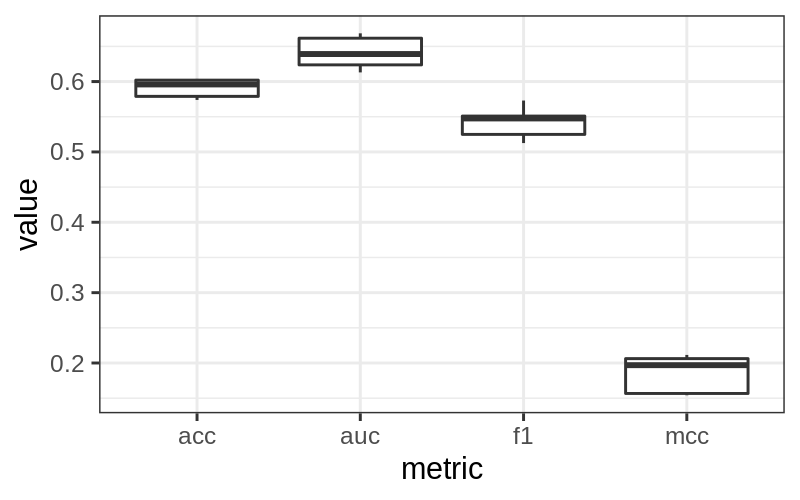

In [50]:
# performance
cls_perf(res)

In [51]:
# getting feat imp
feat_imp = get_feat_imp(res)
feat_imp

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,nobs,0.06815630
1,shannon,0.04791896
⋮,⋮,⋮
5,simpson,0.002741703
5,pielou,0.022911977


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/03_ML/.figures/71b5369dca5ea8844438c68885636007.RDS 


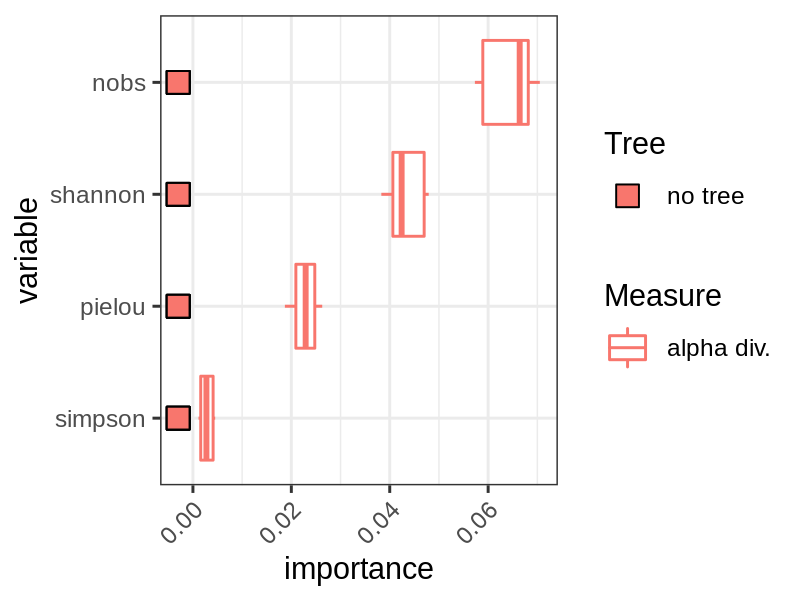

In [52]:
# plotting the most important features
p = plot_feat_imp(feat_imp, y_offset=-0.003)
p.dims(4,3)
Plot(p)

# Performance summary

In [53]:
# formatting
perf_res_f = perf_res %>%
    rbindlist(use.names=TRUE, idcol='dataset') %>%
    separate.(dataset, c('target', 'model'), sep='_') %>%
    filter.(model == 'RF') %>%
    select.(iter, auc, f1, target) %>%
    pivot_longer.(cols=c(auc, f1), names_to='measure', values_to='value') 
perf_res_f

iter,target,measure,value
<int>,<chr>,<chr>,<dbl>
1,westernized,auc,0.6445651
2,westernized,auc,0.6937240
⋮,⋮,⋮,⋮
4,disease,f1,0.5249042
5,disease,f1,0.5509434


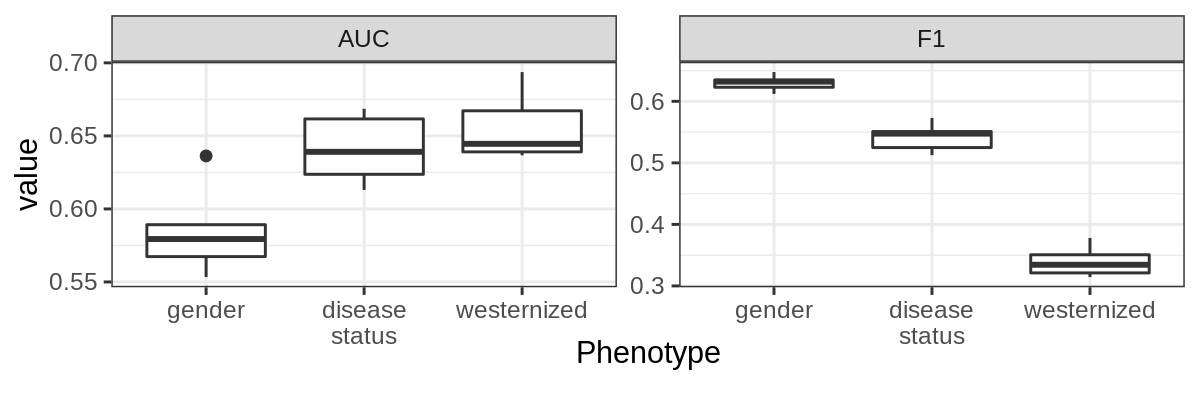

In [54]:
# plotting
p = perf_res_f %>%
    mutate.(target = ifelse(target == 'disease', 'disease\nstatus', target)) %>%
    mutate.(measure = case_when.(measure == 'auc' ~ 'AUC',
                                 measure == 'f1' ~ 'F1')) %>%
    mutate.(mean_value = mean(value),
            .by=c(target, measure)) %>%
    mutate.(target = target %>% reorder(-mean_value)) %>%
    ggplot(aes(target, value)) +
    geom_boxplot() +
    labs(x='Phenotype') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.title.x = element_text(vjust=4)
    )
p.dims(6,2)
plot(p)

## Comparing to performance to all measures

In [55]:
x = rbind(perf_res_f %>% mutate.(dataset = 'tree-agnostic'),
          ml_perf_all %>% mutate.(dataset = 'all measures'))
x

iter,target,measure,value,dataset
<int>,<chr>,<chr>,<dbl>,<chr>
1,westernized,auc,0.6445651,tree-agnostic
2,westernized,auc,0.6937240,tree-agnostic
⋮,⋮,⋮,⋮,⋮
4,disease,f1,0.6833013,all measures
5,disease,f1,0.7015504,all measures


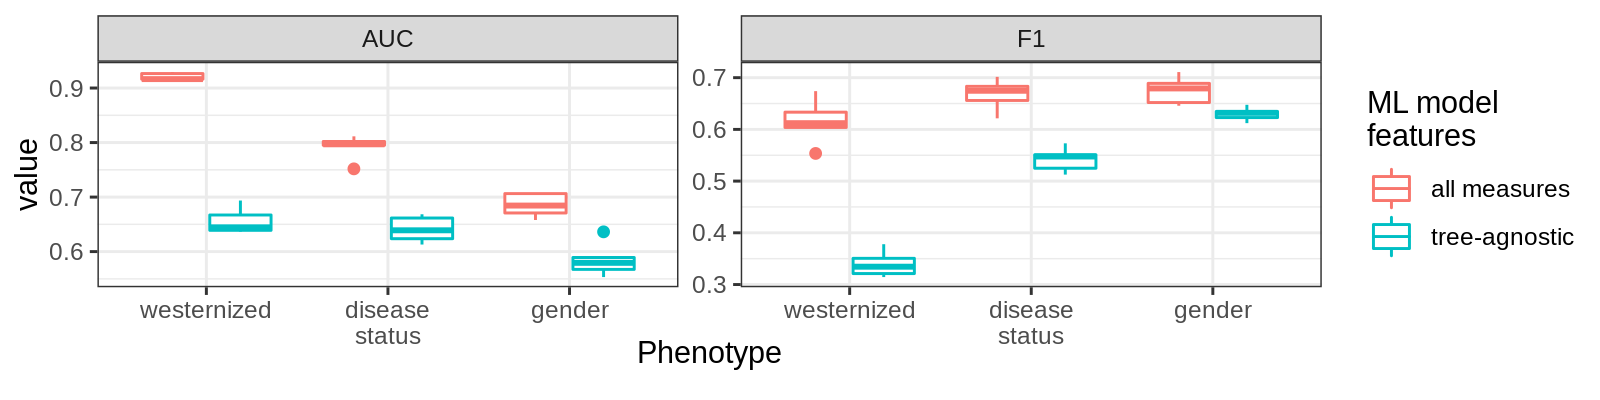

In [56]:
# plotting
p = x %>%
    mutate.(target = ifelse(target == 'disease', 'disease\nstatus', target)) %>%
    mutate.(measure = case_when.(measure == 'auc' ~ 'AUC',
                                 measure == 'f1' ~ 'F1')) %>%
    mutate.(target = factor(target, levels=c('westernized', 'disease\nstatus', 'gender'))) %>%
    ggplot(aes(target, value, color=dataset)) +
    geom_boxplot() +
    scale_color_discrete('ML model\nfeatures') +
    labs(x='Phenotype') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.title.x = element_text(vjust=4)
    )
p.dims(8,2)
plot(p)

### Stats

In [57]:
KW = function(df){
    res = kruskal.test(df$value, df$dataset)
    data.frame(statistic = res$statistic,
               p = res$p.value,
               target = df$target[1])
}
# AUC
x %>%
    filter.(measure == 'auc') %>%
    group_split(target, measure) %>%
    lapply(KW) %>%
    rbindlist(use.names=TRUE) %>%
    mutate.(p = p %>% as.Num,
            padj = p %>% p.adjust(method='BH'))

statistic,p,target,padj
<dbl>,<dbl>,<chr>,<dbl>
6.818182,0.009023439,disease,0.009023439
6.818182,0.009023439,gender,0.009023439
6.818182,0.009023439,westernized,0.009023439


In [58]:
# stats for F1
x %>%
    filter.(measure == 'f1') %>%
    group_split(target, measure) %>%
    lapply(KW) %>%
    rbindlist(use.names=TRUE) %>%
    mutate.(p = p %>% as.Num,
            padj = p %>% p.adjust(method='BH'))

statistic,p,target,padj
<dbl>,<dbl>,<chr>,<dbl>
6.818182,0.009023439,disease,0.01353516
5.770909,0.016293604,gender,0.01629360
6.818182,0.009023439,westernized,0.01353516


# sessionInfo

In [59]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/tidyverse-ml/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] parallelMap_1.5.1   randomForest_4.6-14 mlr_2.19.0         
 [4] ParamHelpers_1.14   Boruta_7.0.0        LeyLabRMisc_0.2.0  
 [7] doParallel_1.0.16   iterators_1.0.13    foreach_1.5.1      
[10] tidytable_0.6.5     data.table_1.14.2   ggplot2_3.3.5      